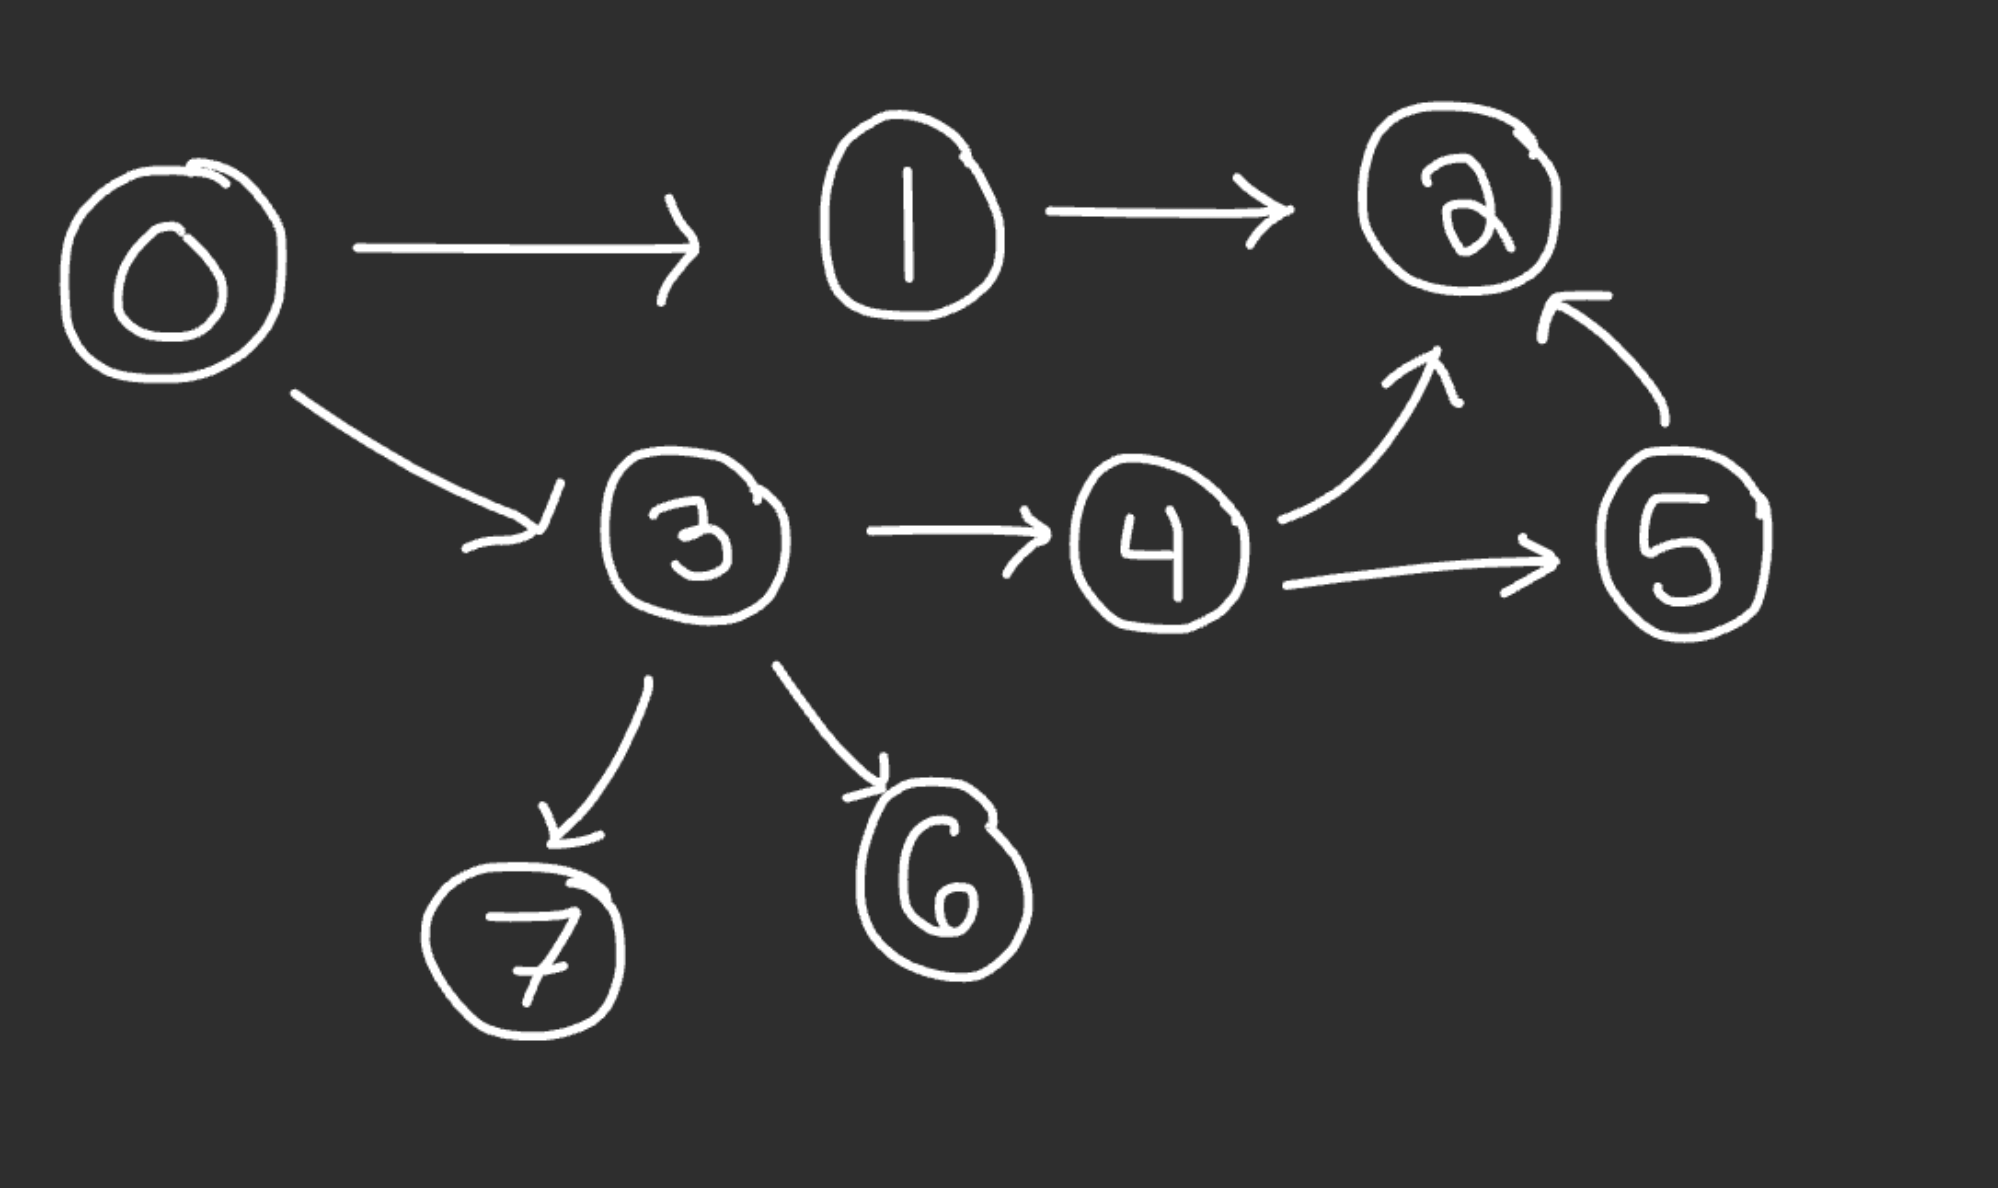

In [9]:
from IPython.display import Image

Image(filename="Graph.png")

In [10]:
# Array of Edges (Directed) [Start, End]
n = 8
A = [[0, 1], [1, 2], [0, 3], [3, 4], [3, 6], [3, 7], [4, 2], [4, 5], [5, 2]]

A

[[0, 1], [1, 2], [0, 3], [3, 4], [3, 6], [3, 7], [4, 2], [4, 5], [5, 2]]

In [11]:
# Convert Array of Edges -> Adjacency Matrix

M = []
for i in range(n):
  M.append([0] * n)

for u, v in A:
  M[u][v] = 1

  # Uncomment the following line if the graph is undirected
  # M[v][u] = 1

M

[[0, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 1],
 [0, 0, 1, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0]]

In [12]:
# Convert Array of Edges -> Adjacency List
from collections import defaultdict

D = defaultdict(list)

for u, v in A:
  D[u].append(v)
  # Uncomment the following line if the graph is undirected
  # D[v].append(u)

D

defaultdict(list, {0: [1, 3], 1: [2], 3: [4, 6, 7], 4: [2, 5], 5: [2]})

In [13]:
D[3]

[4, 6, 7]

In [14]:
# DFS with Recursion - O(V + E) where V is the number of nodes and E is the number of edges

def dfs_recursive(node):
  # Print the current node (this represents "visiting" the node)
  print(node)

  # Explore all neighbors of the current node
  for nei_node in D[node]:
    # If the neighbor has not been visited yet
    if nei_node not in seen:
      # Mark the neighbor as visited
      seen.add(nei_node)
      # Recursively call DFS on the neighbor
      dfs_recursive(nei_node)

# Starting point of DFS
source = 0

# Initialize a set to keep track of visited nodes
seen = set()

# Mark the source node as visited
seen.add(source)

# Start DFS from the source node
dfs_recursive(source)

0
1
2
3
4
5
6
7


In [15]:
# Iterative DFS with Stack - O(V + E)

source = 0  # Starting node for DFS

# Set to keep track of visited nodes
seen = set()
seen.add(source)

# Stack for DFS (LIFO order)
stack = [source]

# While there are nodes to process
while stack:
  # Pop the last added node (DFS uses stack order)
  node = stack.pop()
  print(node)  # "Visit" the node (process it)

  # Explore all neighbors of the current node
  for nei_node in D[node]:
    # If the neighbor hasn't been visited yet
    if nei_node not in seen:
      # Mark neighbor as visited
      seen.add(nei_node)
      # Push neighbor onto the stack for later processing
      stack.append(nei_node)

0
3
7
6
4
5
2
1


In [17]:
# BFS (Queue) - O(V + E)

source = 0  # Starting node for BFS

from collections import deque  # Import deque for efficient queue operations

# Set to keep track of visited nodes
seen = set()
seen.add(source)

# Queue for BFS (FIFO order)
q = deque()
q.append(source)

# While there are nodes to process
while q:
  # Pop from the left of the queue (FIFO order)
  node = q.popleft()
  print(node)  # "Visit" the node (process it)

  # Explore all neighbors of the current node
  for nei_node in D[node]:
    # If the neighbor hasn't been visited yet
    if nei_node not in seen:
      # Mark neighbor as visited
      seen.add(nei_node)
      # Enqueue the neighbor to process later
      q.append(nei_node)

0
1
3
2
4
6
7
5


In [18]:
class Node:
  def __init__(self, value):
    self.value = value               # Each node stores a value (like 'A', 'B', etc.)
    self.neighbors = []              # List of neighboring nodes (edges)

  def __str__(self):
    return f'Node({self.value})'     # String representation of the node

  def display(self):
    # Collect values of all neighbors into a list
    connections = [node.value for node in self.neighbors]
    return f'{self.value} is connected to: {connections}'


# Create 4 nodes: A, B, C, D
A = Node('A')
B = Node('B')
C = Node('C')
D = Node('D')

# Connect A ↔ B
A.neighbors.append(B)
B.neighbors.append(A)

# Connect C ↔ D
C.neighbors.append(D)
D.neighbors.append(C)

# Display connections of B
print(B.display())

B is connected to: ['A']
